# **Amelia Lusiana**
**Mini Project Improving Employee Retention by Predicting Employee Attrition Using Machine Learning**

# Part 1
1. Upload file Dataset 
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "PernahBekerja")
4. Membuang data yang tidak diperlukan (Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta))

## 1. Upload Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
from google.colab import files
import plotly.graph_objects as go
import pylab
import scipy.stats as st
import time
from datetime import datetime, date
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
#data prosesing
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  matthews_corrcoef, roc_curve, fbeta_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

In [2]:
#1. upload data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv']))

Saving Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv to Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv


In [3]:
df.shape

(287, 25)

In [4]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

##2. Mengatasi data null

In [6]:
#cek null data
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [7]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [8]:
#handle null data kolom IkutProgramLOP dengan hapus kolom karna data kosong terlalu banyak
df=df.drop(['IkutProgramLOP'],axis=1)

In [9]:
#handle null data kolom AlasanResign
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

In [10]:
#handle null data kolom JumlahKeterlambatanSebulanTerakhir
df['JumlahKeterlambatanSebulanTerakhir'].fillna(value = df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace = True)

In [11]:
#handle null data kolom JumlahKeikutsertaanProjek
df['JumlahKeikutsertaanProjek'].fillna(value = df['JumlahKeikutsertaanProjek'].median(), inplace = True)

In [12]:
#handle null data kolom SkorKepuasanPegawai
df['SkorKepuasanPegawai'].fillna(value = df['SkorKepuasanPegawai'].median(), inplace = True)

In [13]:
#handle null data kolom JumlahKetidakhadiran
df['JumlahKetidakhadiran'].fillna(value = df['JumlahKetidakhadiran'].median(), inplace = True)

In [14]:
#cek null data
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [15]:
#cek data duplicated
df.duplicated().sum()

0

##3. Mengganti value yang tidak sesuai

In [16]:
#rubah datatype kolom float to int
df['SkorKepuasanPegawai']  = df['SkorKepuasanPegawai'].astype('int')
df['JumlahKeikutsertaanProjek']  = df['JumlahKeikutsertaanProjek'].astype('int')
df['JumlahKeterlambatanSebulanTerakhir']  = df['JumlahKeterlambatanSebulanTerakhir'].astype('int')
df['JumlahKetidakhadiran']  = df['JumlahKetidakhadiran'].astype('int')

In [17]:
#rubah data type kolom object jadi datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

In [18]:
#rubah isi data kolom PernakBekerja
df['PernahBekerja'] = df['PernahBekerja'].replace({'yes': 1})
df['PernahBekerja']  = df['PernahBekerja'].astype('int')

In [19]:
#rubah isi data kolom AlasanResign
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (UI & UX)': 'lainnya'})

In [20]:
#rubah data berbeda dikolom StatusPernikahan
df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-': 'Lainnya'})


##4. Membuang data yang tidak diperlukan

In [21]:
df['PernahBekerja'].value_counts()

1    287
Name: PernahBekerja, dtype: int64

In [22]:
#menghapus kolom PernahBekerja karena isinya hanya 1 unique value
df=df.drop(['PernahBekerja'],axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [24]:
cat = df.select_dtypes(include='object')
catcol = cat.columns
num = df.select_dtypes(include=['int64', 'float64'])
numcol = num.columns

In [25]:
for col in catcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value counts kolom StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           51
Bercerai          47
Name: StatusPernikahan, dtype: int64

Value counts kolom JenisKelamin:
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value counts kolom StatusKepegawaian:
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value counts kolom Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                   

In [26]:
for col in numcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom EnterpriseID:
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64

Value counts kolom SkorSurveyEngagement:
3    132
4     96
2     43
1     14
5      2
Name: SkorSurveyEngagement, dtype: int64

Value counts kolom SkorKepuasanPegawai:
3    96
5    91
4    90
2     8
1     2
Name: SkorKepuasanPegawai, dtype: int64

Value counts kolom JumlahKeikutsertaanProjek:
0    224
6     20
5     20
7      9
4      8
3      3
1      1
2      1
8      1
Name: JumlahKeikutsertaanProjek, dtype: int64

Value counts kolom JumlahKeterlambatanSebulanTerakhir:
0    256
4      8
3      6
2      6
5      5
6      5
1      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64

Value counts kolom JumlahKetidakhadiran:
4     20
2     20
15    19
16    17
7     17
6     16
10    16
14    16
3     16
13    15
19    15
17    14
1     14
20    13
9     12
11    12
8     

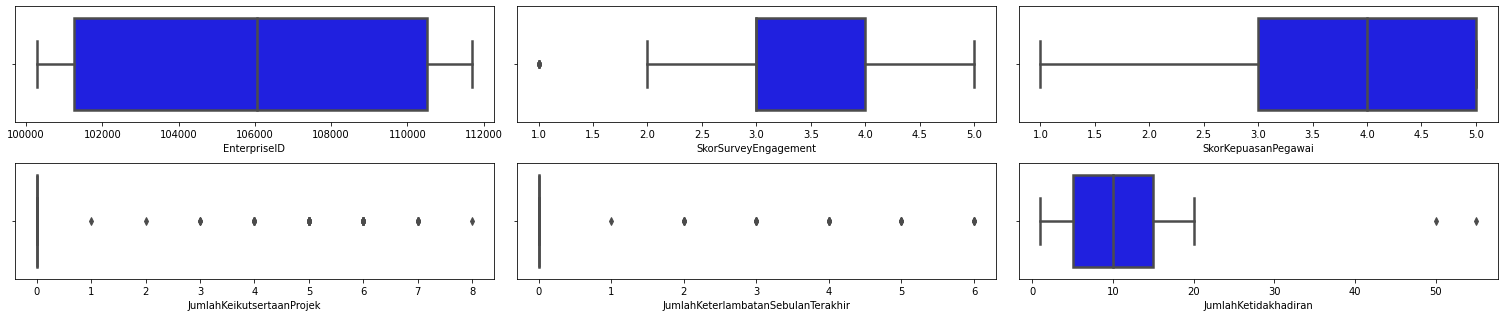

In [27]:
plt.figure(figsize=(21,15))
for i in range(0, len(numcol)):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x=df[numcol[i]], color='blue', orient='n')
    plt.tight_layout()

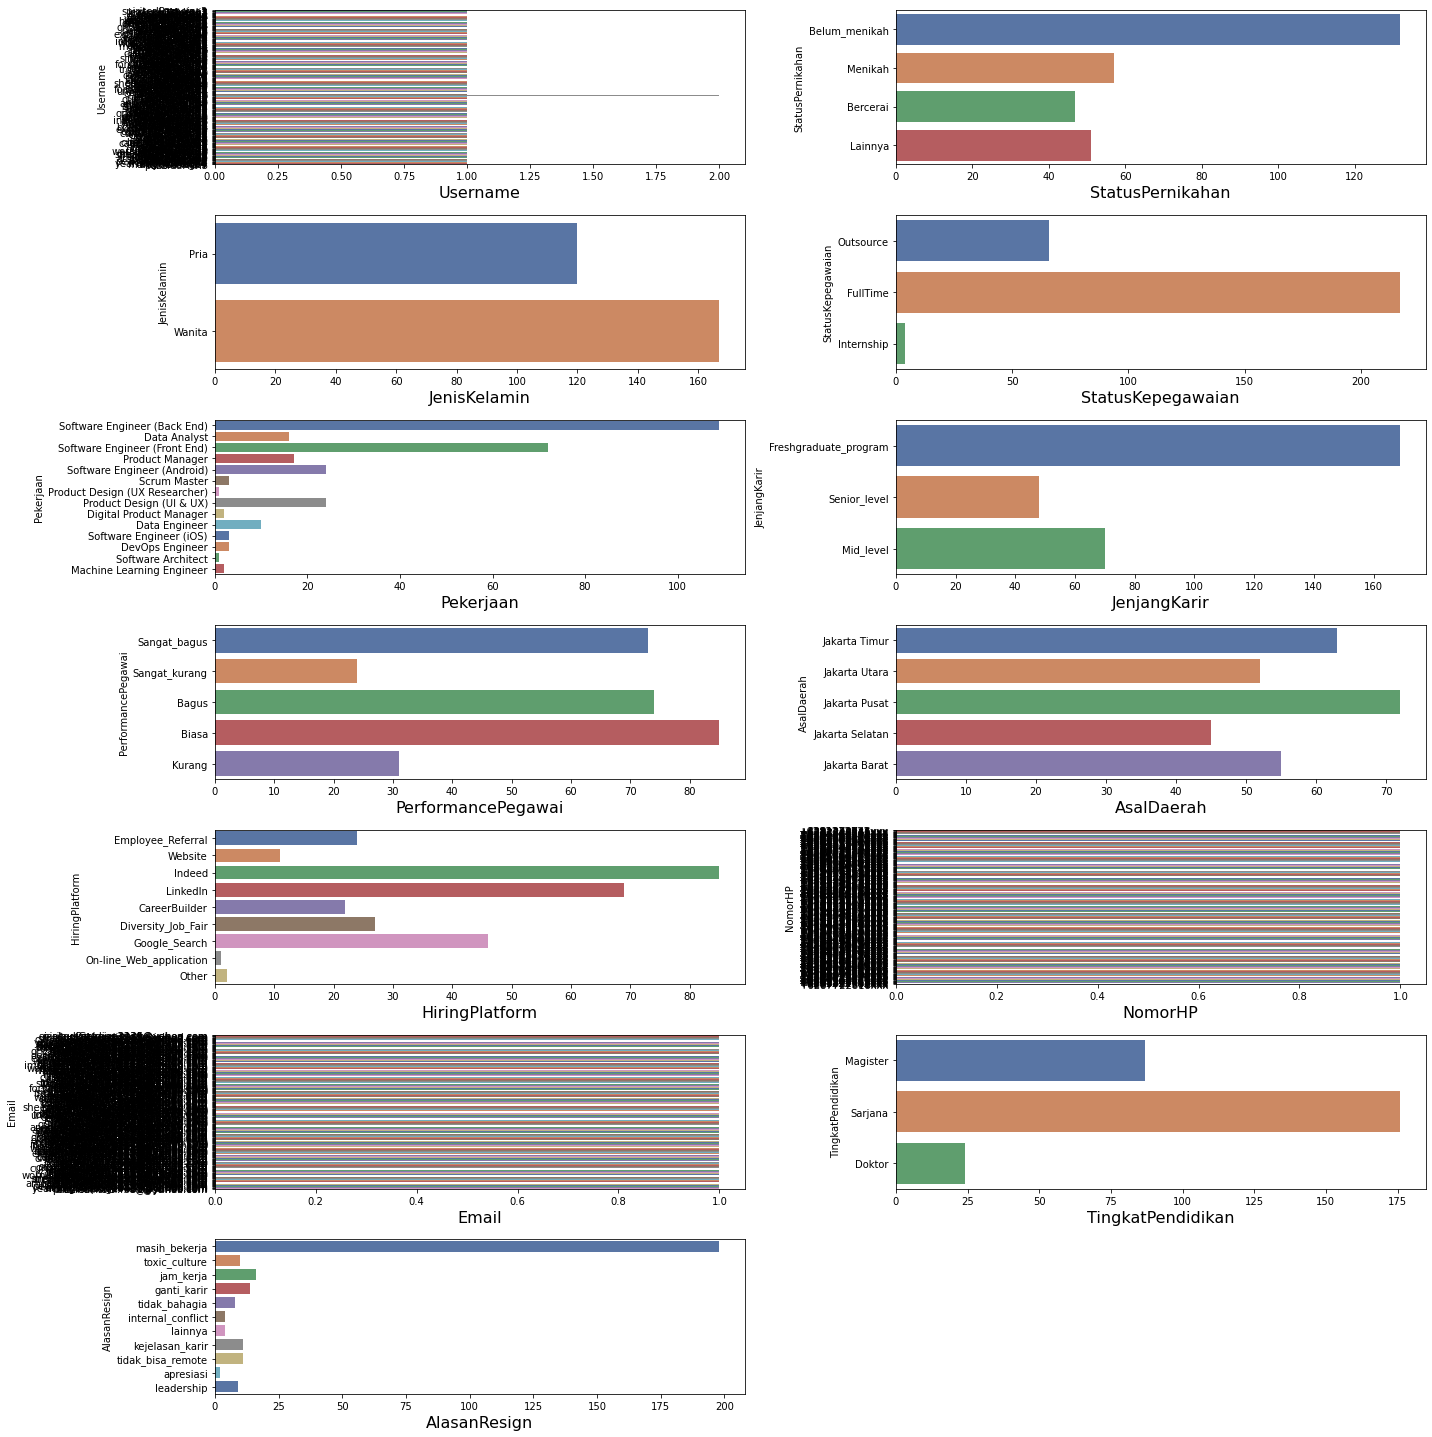

In [28]:
plt.figure(figsize = (20,20))
for i in range(0, len(catcol)):
    plt.subplot(7, 2, i+1)
    sns.countplot(y=df[catcol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catcol[i],fontsize=16)

# Part 2
1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign)
2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu)
3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna)
4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya)
5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan)
6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

##1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign.

In [29]:
df['StatusKaryawan'] = df['AlasanResign'].replace({'masih_bekerja':0, 'jam_kerja':1, 'ganti_karir':1, 'kejelasan_karir':1, 'tidak_bisa_remote':1, 'toxic_culture':1,
                                                   'leadership':1, 'tidak_bahagia':1, 'internal_conflict':1, 'lainnya':1, 'apresiasi':1})

In [30]:
#buat kolom baru TahunHiring dan TahunResign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

In [31]:
#rubah kolo baru jadi int
df['TahunHiring'] = df['TahunHiring'].astype('Int64')
df['TahunResign'] = df['TahunResign'].astype('Int64')

In [32]:
karyawan_masuk = df.groupby(['TahunHiring'])['StatusKaryawan'].count().to_frame().reset_index()
karyawan_masuk

,TahunHiring,StatusKaryawan
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [33]:
karyawan_keluar = df.groupby(['TahunResign'])['StatusKaryawan'].count().to_frame().reset_index()
karyawan_keluar

,TahunResign,StatusKaryawan
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


##2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh.

In [34]:
turnover=pd.merge(karyawan_masuk,karyawan_keluar, left_on='TahunHiring', right_on='TahunResign', how='outer')
turnover= turnover.astype('Int64')
turnover

,TahunHiring,StatusKaryawan_x,TahunResign,StatusKaryawan_y
0,2006,1,<NA>,<NA>
1,2007,2,<NA>,<NA>
2,2008,2,<NA>,<NA>
3,2009,7,<NA>,<NA>
4,2010,8,<NA>,<NA>
5,2011,76,<NA>,<NA>
6,2012,41,<NA>,<NA>
7,2013,43,2013,5
8,2014,56,2014,12
9,2015,31,2015,8


## 3. Lakukan imputation pada data tahun yang kosong sesuai urutan

In [35]:
turnover = turnover.fillna(0).astype('int')
turnover.columns = ['TahunHiring', 'KaryawanHiring', 'TahunResign', 'KaryawanResign']
turnover

,TahunHiring,KaryawanHiring,TahunResign,KaryawanResign
0,2006,1,0,0
1,2007,2,0,0
2,2008,2,0,0
3,2009,7,0,0
4,2010,8,0,0
5,2011,76,0,0
6,2012,41,0,0
7,2013,43,2013,5
8,2014,56,2014,12
9,2015,31,2015,8


In [36]:
turnover.loc[13:, 'TahunHiring'] = 2019, 2020
turnover.loc[:6, 'TahunResign'] = range(2006,2013)
turnover

,TahunHiring,KaryawanHiring,TahunResign,KaryawanResign
0,2006,1,2006,0
1,2007,2,2007,0
2,2008,2,2008,0
3,2009,7,2009,0
4,2010,8,2010,0
5,2011,76,2011,0
6,2012,41,2012,0
7,2013,43,2013,5
8,2014,56,2014,12
9,2015,31,2015,8


##4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua.

In [37]:
turnover['KaryawanPerTahun'] = turnover['KaryawanHiring'] - turnover['KaryawanResign']
turnover

,TahunHiring,KaryawanHiring,TahunResign,KaryawanResign,KaryawanPerTahun
0,2006,1,2006,0,1
1,2007,2,2007,0,2
2,2008,2,2008,0,2
3,2009,7,2009,0,7
4,2010,8,2010,0,8
5,2011,76,2011,0,76
6,2012,41,2012,0,41
7,2013,43,2013,5,38
8,2014,56,2014,12,44
9,2015,31,2015,8,23


In [38]:
#buat kolom dengan row index yang sama dengan kolom lain
turnover['TotalKaryawan'] = turnover['KaryawanPerTahun'].copy()

#rubah isi kolom baru dengan value penambahan
for i in range(1, len(turnover)):
  turnover.loc[i, 'TotalKaryawan'] = round(turnover.loc[i-1, 'TotalKaryawan'] + turnover.loc[i, 'KaryawanHiring'] - turnover.loc[i,'KaryawanResign'],0)

turnover

,TahunHiring,KaryawanHiring,TahunResign,KaryawanResign,KaryawanPerTahun,TotalKaryawan
0,2006,1,2006,0,1,1
1,2007,2,2007,0,2,3
2,2008,2,2008,0,2,5
3,2009,7,2009,0,7,12
4,2010,8,2010,0,8,20
5,2011,76,2011,0,76,96
6,2012,41,2012,0,41,137
7,2013,43,2013,5,38,175
8,2014,56,2014,12,44,219
9,2015,31,2015,8,23,242


##5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada

In [39]:
karyawan = turnover.copy()
karyawan = karyawan.drop(['TahunResign'],axis=1)
karyawan.columns = ['Tahun', 'KaryawanHiring', 'KaryawanResign', 'KaryawanPerTahun', 'TotalKaryawan']

In [40]:
fig = px.line(karyawan, 
              x = 'Tahun', 
              y = ['KaryawanHiring','KaryawanResign','TotalKaryawan'],
              title = 'Perubahan Jumlah Karyawan', 
              template = 'plotly_dark')
fig.show()

##6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya.

Dari jumlah karyawan perusahaan dapat disimpulkan sebagai berikut:
* Perusahaan dibangun pada tahun 2006, dan mulai merintis menjadi perusahaan besar.
* Pada tahun 2011 perusahaan mulai berkembang dengan menambahkan karyawan sebanyak 76 orang, jadi total karyawan pada tahun 2011 sebanyak 96 orang.
* Pada tahun 2013 mulai ada Karyawan yang Resign, tetapi masih ada penambahan karyawan sebanyak 43 orang.
* Pada tahun 2017 terjadi pengurangan karyawan (resign) yang signifikan sebanyak 19 orang, tetapi hanya ada penambahan karyawan (hiring) sebanyak 5 orang.
* Pada tahun 2018 juga terjadi pengurangan karyawan (resign) yang signifikan sebanyak 26 orang, dan hanya ada penambahan karyawan (hiring) sebanyak 1 orang.
* Setelah tahun 2018 tidak ada penambahan karyawan (hiring) tetapi masih ada pengurangan karyawab (resign).

#Part 3
1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum)
2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join)
3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign) (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee)
4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan)
5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat)
6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan)
7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

## 1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign.

In [41]:
belumresign = df[(df['StatusKaryawan'] == 0)]
sudahresign = df[(df['StatusKaryawan'] == 1)]

In [42]:
MasihKaryawan = belumresign.groupby(['Pekerjaan'])['StatusKaryawan'].count().to_frame().reset_index()
MasihKaryawan

,Pekerjaan,StatusKaryawan
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [43]:
KaryawanResign = sudahresign.groupby(['Pekerjaan'])['StatusKaryawan'].count().to_frame().reset_index()
KaryawanResign

,Pekerjaan,StatusKaryawan
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


##2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan.

In [44]:
#menggabungkan 2 tabel masih karyawan dan karyawan resign berdasarkan pekerjaan
pekerjaan = pd.merge(MasihKaryawan,KaryawanResign, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')

#mengganti nama kolom tabel
pekerjaan.columns = ['Pekerjaan', 'MasihKaryawan', 'KaryawanResign']

#mengisi data null dan merubah datatype menjadi int
pekerjaan['KaryawanResign'] = pekerjaan['KaryawanResign'].fillna(0).astype('Int64')

pekerjaan

,Pekerjaan,MasihKaryawan,KaryawanResign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


##3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign).

In [45]:
#buat kolom baru JumlahKaryawan
pekerjaan['JumlahKaryawan']= pekerjaan['MasihKaryawan'] + pekerjaan['KaryawanResign']
pekerjaan

,Pekerjaan,MasihKaryawan,KaryawanResign,JumlahKaryawan
0,Data Analyst,8,8,16
1,Data Engineer,7,3,10
2,DevOps Engineer,3,0,3
3,Digital Product Manager,2,0,2
4,Machine Learning Engineer,2,0,2
5,Product Design (UI & UX),15,9,24
6,Product Design (UX Researcher),1,0,1
7,Product Manager,11,6,17
8,Scrum Master,3,0,3
9,Software Architect,1,0,1


In [46]:
#buat kolom baru PersentaseMasihKaryawan
pekerjaan['PersentaseMasihKaryawan']= round((pekerjaan['MasihKaryawan'] / pekerjaan['JumlahKaryawan']) * 100,1)
pekerjaan.sort_values(by='PersentaseMasihKaryawan', ascending= True)

,Pekerjaan,MasihKaryawan,KaryawanResign,JumlahKaryawan,PersentaseMasihKaryawan
0,Data Analyst,8,8,16,50.0
12,Software Engineer (Front End),44,28,72,61.1
5,Product Design (UI & UX),15,9,24,62.5
7,Product Manager,11,6,17,64.7
1,Data Engineer,7,3,10,70.0
10,Software Engineer (Android),17,7,24,70.8
11,Software Engineer (Back End),81,28,109,74.3
2,DevOps Engineer,3,0,3,100.0
3,Digital Product Manager,2,0,2,100.0
4,Machine Learning Engineer,2,0,2,100.0


## 4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya.


In [47]:
fig = px.histogram(pekerjaan, y = 'Pekerjaan', x = 'PersentaseMasihKaryawan', title = 'Persentasi Karyawan yang Ada', text_auto=True)
fig.show()

##5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign.

In [48]:
#buat kolom baru PersentaseKaryawanResign
pekerjaan['PersentaseKaryawanResign']= round((pekerjaan['KaryawanResign'] / pekerjaan['JumlahKaryawan']) * 100,1)
pekerjaan.sort_values(by='PersentaseKaryawanResign', ascending= False)

,Pekerjaan,MasihKaryawan,KaryawanResign,JumlahKaryawan,PersentaseMasihKaryawan,PersentaseKaryawanResign
0,Data Analyst,8,8,16,50.0,50.0
12,Software Engineer (Front End),44,28,72,61.1,38.9
5,Product Design (UI & UX),15,9,24,62.5,37.5
7,Product Manager,11,6,17,64.7,35.3
1,Data Engineer,7,3,10,70.0,30.0
10,Software Engineer (Android),17,7,24,70.8,29.2
11,Software Engineer (Back End),81,28,109,74.3,25.7
2,DevOps Engineer,3,0,3,100.0,0.0
3,Digital Product Manager,2,0,2,100.0,0.0
4,Machine Learning Engineer,2,0,2,100.0,0.0


Berdasarkan presentase karyawan yang resign adalah pekerjaan Data Analyst yang memiliki nilai resign tertinggi, tetapi berdasarkan jumlah karyawan yang resign adalah Software Engineer (Front End).

In [49]:
DataAnalystResign = df[(df['StatusKaryawan'] == 1) & (df['Pekerjaan'] == 'Data Analyst')]
SoftEngFrontResign = df[(df['StatusKaryawan'] == 1) & (df['Pekerjaan'] == 'Software Engineer (Front End)')]

###Data Analyst

In [50]:
JenjangKarirDA = DataAnalystResign.groupby(['JenjangKarir'])['StatusKaryawan'].count().to_frame().reset_index()
JenjangKarirDA.columns = ['JenjangKarir', 'JumlahKaryawan']
JenjangKarirDA

,JenjangKarir,JumlahKaryawan
0,Freshgraduate_program,8


In [51]:
PerformanceDA = DataAnalystResign.groupby(['PerformancePegawai'])['StatusKaryawan'].count().to_frame().reset_index()
PerformanceDA.columns = ['PerformancePegawai', 'JumlahKaryawan']
PerformanceDA

,PerformancePegawai,JumlahKaryawan
0,Bagus,1
1,Biasa,2
2,Sangat_bagus,4
3,Sangat_kurang,1


In [52]:
AlasanDA = DataAnalystResign.groupby(['AlasanResign'])['StatusKaryawan'].count().to_frame().reset_index()
AlasanDA.columns = ['AlasanResign', 'JumlahKaryawan']
AlasanDA

,AlasanResign,JumlahKaryawan
0,internal_conflict,2
1,toxic_culture,6


###Software Engineer (Front End)

In [53]:
JenjangKarirSEFE = SoftEngFrontResign.groupby(['JenjangKarir'])['StatusKaryawan'].count().to_frame().reset_index()
JenjangKarirSEFE.columns = ['JenjangKarir', 'JumlahKaryawan']
JenjangKarirSEFE

,JenjangKarir,JumlahKaryawan
0,Freshgraduate_program,11
1,Mid_level,9
2,Senior_level,8


In [54]:
PerformanceSEFE = SoftEngFrontResign.groupby(['PerformancePegawai'])['StatusKaryawan'].count().to_frame().reset_index()
PerformanceSEFE.columns = ['PerformancePegawai', 'JumlahKaryawan']
PerformanceSEFE

,PerformancePegawai,JumlahKaryawan
0,Bagus,4
1,Biasa,8
2,Kurang,4
3,Sangat_bagus,10
4,Sangat_kurang,2


In [55]:
AlasanSEFE = SoftEngFrontResign.groupby(['AlasanResign'])['StatusKaryawan'].count().to_frame().reset_index()
AlasanSEFE.columns = ['AlasanResign', 'JumlahKaryawan']
AlasanSEFE

,AlasanResign,JumlahKaryawan
0,apresiasi,1
1,ganti_karir,2
2,jam_kerja,4
3,kejelasan_karir,4
4,lainnya,2
5,leadership,3
6,tidak_bahagia,1
7,tidak_bisa_remote,8
8,toxic_culture,3


##6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya.

###Data Analyst

In [56]:
fig = px.sunburst(DataAnalystResign, path=['AlasanResign', 'PerformancePegawai', 'JenjangKarir'], values='StatusKaryawan')
fig.show()

###Software Engineer (Front End)

In [57]:
fig = px.sunburst(SoftEngFrontResign, path=['AlasanResign', 'PerformancePegawai', 'JenjangKarir'], values='StatusKaryawan')
fig.show()

##7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya.

###Data Analyst
Dari 8 orang karyawan Data Analyst yang resign, semua nya adalah Fresh Graduate, 6 orang diantaranya resign karena Toxic Culture dan 4 diantaranya memiliki Performance Sangat Bagus.

###Software Engineer (Front End)
Dari 28 orang karyawan Software Engineer (Front End) yang resign, 11 orang diantaranya adalah Fresh Graduate, 8 orang diantaranya resign karena Tidak Bisa Remote dan 10 orang diantaranya memiliki Performance Sangat Bagus.

###Rekomendasi untuk management
Employee retention mengacu pada kemampuan sebuah perusahaan untuk mempertahankan sumber daya manusia (dalam hal ini karyawan) miliknya dalam periode tertentu demi mencegah terjadinya pergantian karyawan, atau employee turnover, yang tidak diperlukan. Hal ini sangat penting karena bersangkutan dengan keefektifan perusahaan dan meningkatkan Loyalitas Karyawan. Jika ada banyak karyawan yang meninggalkan perusahaan, entah karena alasan apa pun, maka perusahaan tidak akan dapat berjalan dengan efektif. Hal tersebut dikarenakan perusahaan harus mengeluarkan biaya, waktu, dan usaha untuk menemukan karyawan pengganti dibanding menggunakannya untuk kepentingan lain. Selain itu, perusahaan juga belum tentu bisa menemukan pengganti yang sama baiknya dengan karyawan sebelumnya dalam waktu singkat. Berikut ini adalah beberapa cara untuk meningkatkan nilai employee retention:

1.   Memberikan Lingkungan Kerja yang Nyaman dan Aman
2.   Memberikan Apresiasi Kepada Karyawan
3.   Memberikan Kompensasi dan Hadiah Kepada Karyawan

#Part 4
1. Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise. (Hint: Perhatikan fitur-fitur yang sekiranya perlu ditransformasi, jumlah fitur yang direkomendasikan akhir yang direkomendasikan tidak melebihi 40, membuang fitur-fitur yang sekiranya tidak bermakna secara dunia nyata terhadap model.)
2. Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning). (Hint: Cari metode yang paling cocok untuk menyeimbangkan proporsi data training (berdasarkan variable target) agar model nantinya tidak bersifat diskriminatif)
3. Latihlah model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection. (Hint: Perhatikan jenis metrics yang ada, lakukan training pada data yang sudah dilakukan imbalanced learning)
4. Pilih ML model terbaik, kemudian lakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas (Hint: Perhatikan hyperparameter yang ada pada model terbaik, lakukan tuning yang)
5. Tampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target. (Hint: Tampilkan visualisasi seperti confusion matrix, ROC plot, atau yang lainnya)

##1. Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise.


In [58]:
#cek null data
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
StatusKaryawan                    

In [59]:
#cek data duplicated
df.duplicated().sum()

0

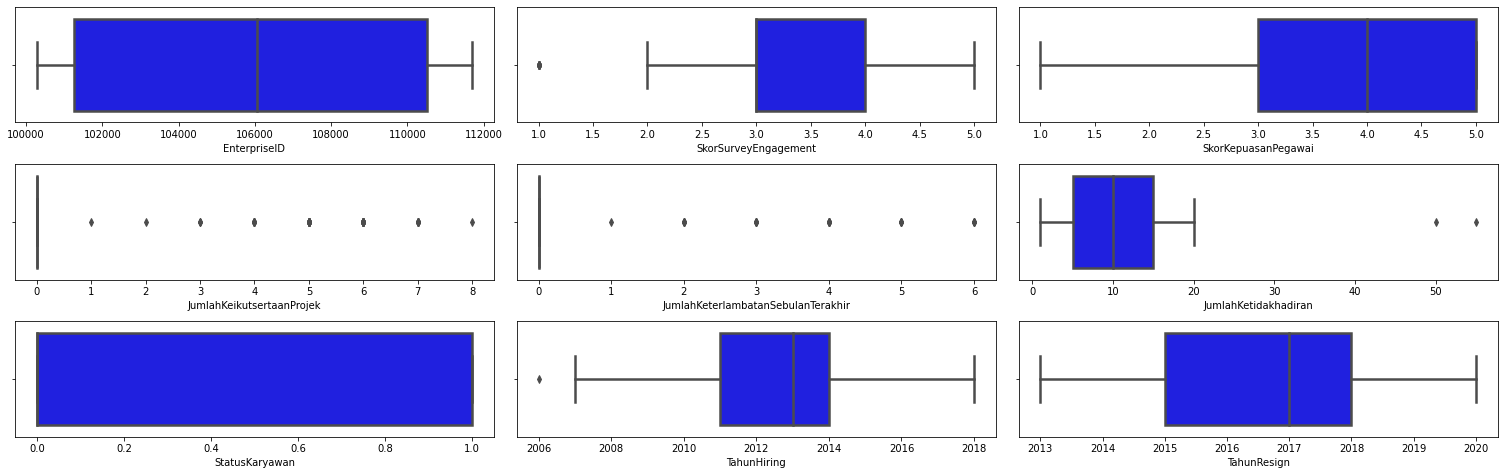

In [60]:
num = df.select_dtypes(include=['int64', 'float64'])
numcol = num.columns
plt.figure(figsize=(21,15))
for i in range(0, len(numcol)):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x=df[numcol[i]], color='blue', orient='n')
    plt.tight_layout()

Handle Outliers

In [61]:
#menghapus outlier kolom  JumlahKetidakhadiran
Q1 = df['JumlahKetidakhadiran'].quantile(0.05)
Q3 = df['JumlahKetidakhadiran'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['JumlahKetidakhadiran'] >= Q1 - 1.5*IQR) & (df['JumlahKetidakhadiran'] <= Q3 + 1.5*IQR)]

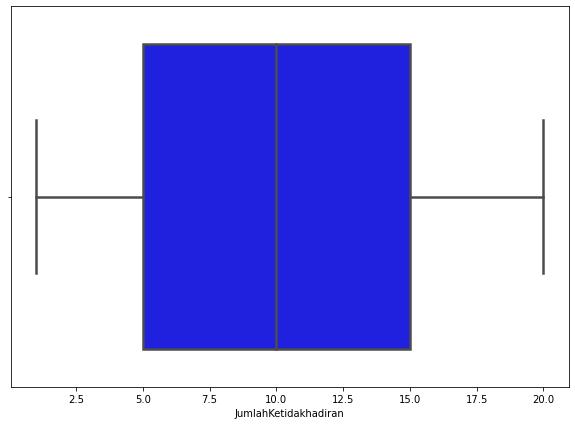

In [62]:
sns.boxplot(x=df['JumlahKetidakhadiran'], color='blue', orient='n')

Feature Engineering

In [63]:
#buat kolom umur
df['Umur'] = (datetime.now().year) - (df['TanggalLahir'].dt.year)

In [64]:
#buat kolom lama bekerja
df['LamaBekerja'] = (datetime.now().year) - (df['TanggalHiring'].dt.year) #mengisi data karyawan yang masih bekerja
df['LamaBekerja'] = df['LamaBekerja'].fillna((df['TanggalResign'].dt.year) - (df['TanggalHiring'].dt.year)) #mengisi data karyawan yang sudah resign

In [133]:
df1 = df.copy()

Feature Encoding

In [134]:
#label encoding kolom JenisKelamin, AsalDaerah, HiringPlatform, dan AlasanResign
le_cat = preprocessing.LabelEncoder()
df1['JenisKelamin']= le_cat.fit_transform(df['JenisKelamin'])
df1['AsalDaerah']= le_cat.fit_transform(df['AsalDaerah'])
df1['HiringPlatform']= le_cat.fit_transform(df['HiringPlatform'])
df1['AlasanResign']= le_cat.fit_transform(df['AlasanResign'])

In [135]:
#one hot encoding kolom PerformancePegawai, TingkatPendidikan, Pekerjaan, StatusPernikahan, StatusKepegawaian, dan JenjangKarir 
oh_cat = ['PerformancePegawai', 'TingkatPendidikan', 'Pekerjaan', 'StatusPernikahan', 'StatusKepegawaian', 'JenjangKarir']
df_oh = pd.get_dummies(df1[oh_cat])

In [136]:
#menggabungkan data encoding
df1 = df1.drop(oh_cat,axis=1).merge(df_oh, left_index=True, right_index=True)

Feature Selection

In [137]:
#hapus kolom Username, EnterpriseID, NomorHP, Email, TanggalHiring, TanggalResign, TanggalLahir, TanggalPenilaianKaryawan, TahunHiring, dan TahunResign
df1 = df1.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalHiring', 'TanggalResign', 'TanggalLahir', 'TanggalPenilaianKaryawan', 'TahunHiring', 'TahunResign'], axis=1)

In [138]:
#melihat korelasi feature dengan target
correlations = df1.corr(method='spearman')['StatusKaryawan'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 LamaBekerja                                0.000094
PerformancePegawai_Biasa                   0.001345
JumlahKeterlambatanSebulanTerakhir         0.009621
TingkatPendidikan_Doktor                   0.013776
JenjangKarir_Senior_level                  0.020444
Pekerjaan_Product Manager                  0.022098
JumlahKetidakhadiran                       0.023917
JenjangKarir_Mid_level                     0.025676
StatusPernikahan_Menikah                   0.028817
StatusKepegawaian_FullTime                 0.032710
Pekerjaan_Product Design (UI & UX)         0.041040
PerformancePegawai_Sangat_kurang           0.041040
JumlahKeikutsertaanProjek                  0.056496
TingkatPendidikan_Magister                 0.084847
AsalDaerah                                 0.087151
Pekerjaan_Data Analyst                     0.098790
Pekerjaan_Software Engineer (Front End)    0.102026
PerformancePegawai_Sangat_bagus            0.107604
StatusKepegawaian_Internship       

In [139]:
#karena alasan resign di dapat setelah resign jadi tidak bisa di ikuti sebagai feature predict
df1 = df1.drop('AlasanResign', axis=1)

In [140]:
#merubah data type menjadi uint8
nums = df1.select_dtypes(include=['int64']).columns.to_list()

for x in nums:
    df1[x] = df1[x].astype('uint8')

##2. Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning).

In [141]:
#pemisahan target dan feature
X = df1.drop('StatusKaryawan', axis=1)
y = df1[['StatusKaryawan']].copy()

Stratified K-Fold

In [142]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(X, y):
	# select rows
	X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
	y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
	test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
	print('>Train: 0={}, 1={}, Test: 0={}, 1={}'.format(train_0, train_1, test_0, test_1))

>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57


In [143]:
y_train_val = y_train.value_counts()
df_y_val = pd.DataFrame(y_train_val, columns=['total']).reset_index()
df_y_val['percentage'] = df_y_val['total']/df_y_val['total'].sum()
df_y_val

,StatusKaryawan,total,percentage
0,0,157,0.688596
1,1,71,0.311404


In [144]:
y_test_val = y_test.value_counts()
df_y_val = pd.DataFrame(y_test_val, columns=['total']).reset_index()
df_y_val['percentage'] = df_y_val['total']/df_y_val['total'].sum()
df_y_val

,StatusKaryawan,total,percentage
0,0,39,0.684211
1,1,18,0.315789


##3. Latihlah model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection.

Scalling Data

In [145]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, roc_curve, fbeta_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    pred_y = model.predict(X_test)
    pred_train_y = model.predict(X_train)
    pred_proba_test_y = model.predict_proba(X_test)
    pred_proba_train_y = model.predict_proba(X_train)
    
    cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    pred_thresh = np.where(pred_proba_test_y[:, 1] >= 0.41, 1, 0)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, pred_train_y))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred_y))
    
    print("Precision (Train Set): %.2f" % round(precision_score(y_train, pred_train_y)*100, 2), "%")
    print("Precision (Test Set): %.2f" % round(precision_score(y_test, pred_y)*100,2), "%")
    
    print("Recall (Train Set): %.2f" % round(recall_score(y_train, pred_train_y)*100, 2), "%")
    print("Recall (Test Set): %.2f" % round(recall_score(y_test, pred_y)*100, 2), "%")

    print(f"Confusion Matrix (Train Set): \n {confusion_matrix(y_train, pred_train_y)}\n")
    print(f"Confusion Matrix (Test Set): \n {confusion_matrix(y_test, pred_y)}\n")


Logistic Regression

In [169]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train.values.ravel()) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.65
Precision (Train Set): 76.47 %
Precision (Test Set): 37.50 %
Recall (Train Set): 18.31 %
Recall (Test Set): 16.67 %
Confusion Matrix (Train Set): 
 [[153   4]
 [ 58  13]]

Confusion Matrix (Test Set): 
 [[34  5]
 [15  3]]



Decision Tree

In [148]:
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.54
Precision (Train Set): 100.00 %
Precision (Test Set): 25.00 %
Recall (Train Set): 100.00 %
Recall (Test Set): 22.22 %
Confusion Matrix (Train Set): 
 [[157   0]
 [  0  71]]

Confusion Matrix (Test Set): 
 [[27 12]
 [14  4]]



Random Forest

In [149]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train.values.ravel())
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 100.00 %
Precision (Test Set): 25.00 %
Recall (Train Set): 100.00 %
Recall (Test Set): 5.56 %
Confusion Matrix (Train Set): 
 [[157   0]
 [  0  71]]

Confusion Matrix (Test Set): 
 [[36  3]
 [17  1]]



k-Nearest Neighbors

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
eval_classification(knn)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.60
Precision (Train Set): 71.88 %
Precision (Test Set): 22.22 %
Recall (Train Set): 32.39 %
Recall (Test Set): 11.11 %
Confusion Matrix (Train Set): 
 [[148   9]
 [ 48  23]]

Confusion Matrix (Test Set): 
 [[32  7]
 [16  2]]



**Observasi:**

Hasil Decision tree dan Random Forest adalah Overfitting. Ada beberapa alasan hal tersebut terjadi, yaitu:
* ada data leaks di data preparation
* hanya ada 1 kelas klasifikasi
* tidak menghapus feature yang korelasinya diatas -7

Untuk menanggulanginya bisa dengan train test split data sebelum preparasi, atau bisa hyperparameter tuning.

##4. Pilih ML model terbaik, kemudian lakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas.

In [151]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

Decision Tree

In [152]:
pipeline1 = make_pipeline(DecisionTreeClassifier())
cv_scores1 = cross_val_score(pipeline1, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores1.mean())

Cross-validation accuracy: 0.614035


In [153]:
# Evaluate the model with hyperparameter tuning
pipeline2 = make_pipeline(DecisionTreeClassifier(max_depth=2, random_state=42))
cv_scores2 = cross_val_score(pipeline2, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores2.mean())

Cross-validation accuracy: 0.694737


Random Forest

In [154]:
pipeline3 = make_pipeline(RandomForestClassifier())
cv_scores3 = cross_val_score(pipeline3, X, y.values.ravel(), cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores3.mean())

Cross-validation accuracy: 0.666667


In [155]:
# Evaluate the model with hyperparameter tuning
pipeline4 = make_pipeline(RandomForestClassifier(max_depth=2, random_state=42))
cv_scores4 = cross_val_score(pipeline4, X, y.values.ravel(), cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores4.mean())

Cross-validation accuracy: 0.687719


Dengan membandingkan Accuracy (test) 4 model:
* Logistic Regression                                    = 0.74
* Decision Tree (setelah pipeline dan CV)                = 0.614035
* Decision Tree (setelah pipeline CV dan hyperparameter) = 0.694737
* Random Forest (setelah pipeline dan CV)                = 0.666667
* Random Forest (setelah pipeline CV dan hyperparameter) = 0.687719
* k-Nearest Neighbors                                    = 0.61


##5. Tampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target.

### Classification Report And Confusion Matrix

In [170]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [172]:
print_score(logreg, X_train, y_train, X_test, y_test, train=True)
print_score(logreg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.725118   0.764706   0.72807    0.744912      0.737446
recall       0.974522   0.183099   0.72807    0.578810      0.728070
f1-score     0.831522   0.295455   0.72807    0.563488      0.664589
support    157.000000  71.000000   0.72807  228.000000    228.000000
_______________________________________________
Confusion Matrix: 
 [[153   4]
 [ 58  13]]

Test Result:
Accuracy Score: 64.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.693878   0.375000  0.649123   0.534439      0.593179
recall      0.871795   0.166667  0.649123   0.519231      0.649123
f1-score    0.772727   0.230769  0.649123   0.501748      0.601583
support    39.000000  18.000000  0.649123  57.000000     57.000000
_____________

### Learning Curve

In [90]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

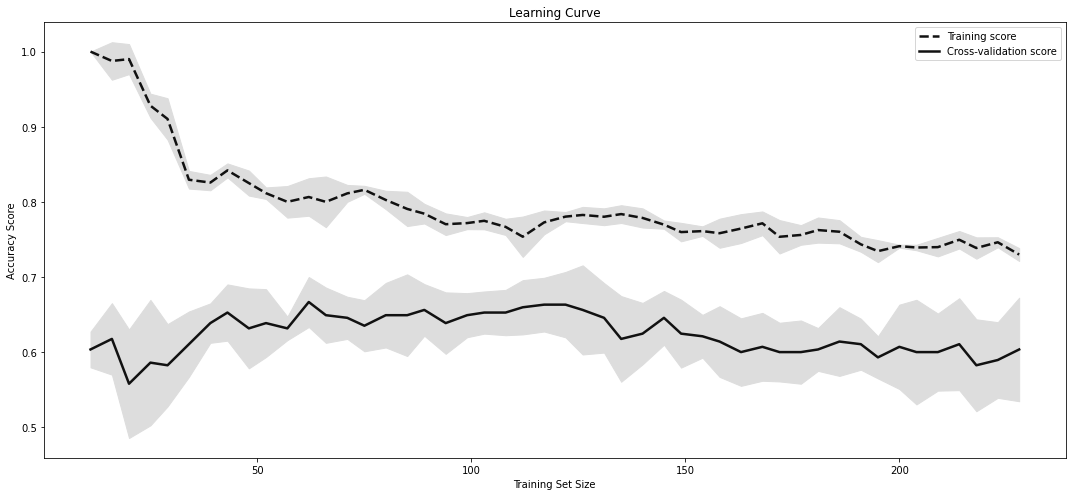

In [91]:
plt.subplots(1, figsize=(15,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Feature Importance

In [93]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
lr_clf = LogisticRegression() # inisiasi object dengan nama logreg
lr_clf.fit(X_train, y_train.values.ravel())

LogisticRegression()

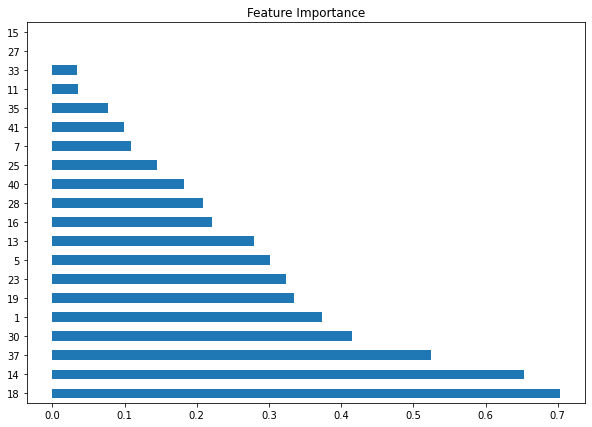

In [94]:
importance = lr_clf.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

5 Feature Importance
* 18  Pekerjaan_Data Analyst
* 14  PerformancePegawai_Sangat_kurang
* 37  StatusKepegawaian_Internship
* 30  Pekerjaan_Software Engineer (Front End)
* 1   AsalDaerah

#Part 5
1. Dari model machine learning yang sudah diselesaikan pada Tugas 4, lanjutkan dengan mencari metode Interpretable / Explainable yang ada untuk mendapatkan insight-insight yang berhubungan dengan permasalahan utama.
2. Carilah insight menarik dari alat-alat Interpretable / Explainable yang bisa menjawab pertanyaan bisnis seputar kepegawaian perusahaan.

##1. Dari model machine learning yang sudah diselesaikan pada Tugas 4, lanjutkan dengan mencari metode Interpretable / Explainable yang ada untuk mendapatkan insight-insight yang berhubungan dengan permasalahan utama.

###Confusion Matrix

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        39
           1       0.38      0.17      0.23        18

    accuracy                           0.65        57
   macro avg       0.53      0.52      0.50        57
weighted avg       0.59      0.65      0.60        57



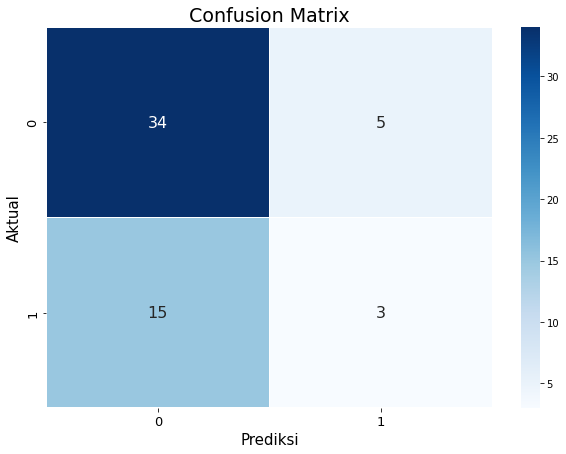

In [95]:
pred_y = logreg.predict(X_test)
# Confusion Matrix Test
cnf_matrix = confusion_matrix(y_test, pred_y)
print(classification_report(y_test, pred_y))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

In [96]:
import sklearn.metrics as metrics
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 'Pred 1'])
conf_matrix(y_test,pred_y)

,Pred 0,Pred 1
True 0,TN = 34 (TNR = 87.18%),FP = 5 (FPR = 12.82%)
True 1,FN = 15 (FNR = 83.33%),TP = 3 (TPR = 16.67%)


###Threshold

In [110]:
pred_y = logreg.predict(X_test)
pred_train_y = logreg.predict(X_train)
pred_proba_test_y = logreg.predict_proba(X_test)
pred_proba_train_y = logreg.predict_proba(X_train)

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test_y[:, 1])
thresholds

array([1.70064994, 0.70064994, 0.66171797, 0.59286002, 0.59171623,
       0.56409626, 0.50947029, 0.46199588, 0.45647113, 0.45076568,
       0.4347509 , 0.39931473, 0.38813785, 0.35617815, 0.35599519,
       0.35159637, 0.33329099, 0.32002142, 0.293283  , 0.2763283 ,
       0.27465587, 0.266169  , 0.25468766, 0.24404   , 0.2243812 ,
       0.22334472, 0.17548443, 0.16980286, 0.16569603, 0.16527226,
       0.12256878])

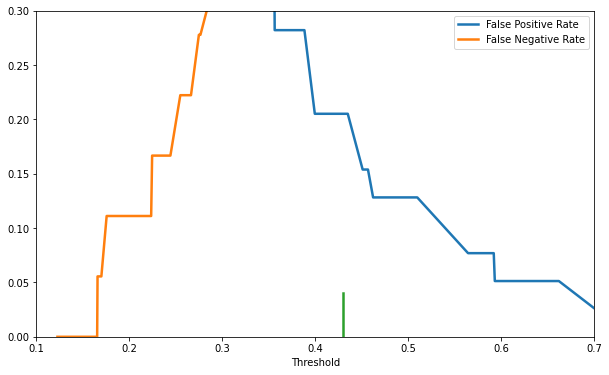

In [113]:
dfplot=pd.DataFrame({'Threshold':thresholds, 'False Positive Rate':fpr, 'False Negative Rate':1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate', 'False Negative Rate'], figsize=(10,6))
ax.plot([0.43,0.43],[0,0.04]) #mark example thresh.
ax.set_xbound(0.1,0.7); ax.set_ybound(0,0.3) #zoom in

###ROC AUC VALUE

In [108]:
roc_auc_value = roc_auc_score(y_test, pred_proba_test_y[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for XGBClassifier on data test: ', round(roc_auc_value*100, 2), '%')
print('Gini for XGBClassifier on data test: ', round(gini_value*100, 2), '%')

AUC for XGBClassifier on data test:  64.1 %
Gini for XGBClassifier on data test:  28.2 %


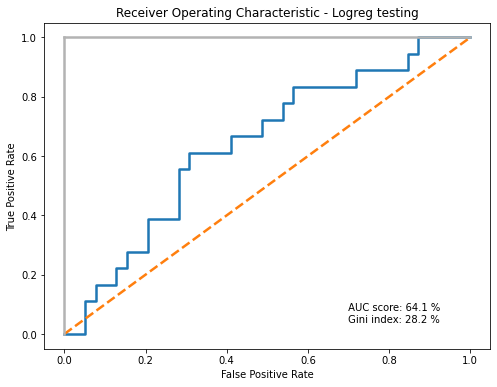

In [109]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logreg testing')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(ax.get_xlim()[1]*6/10, 
         0, 
         f"""\n
         AUC score: {round(roc_auc_value*100, 2)} %
         Gini index: {round(gini_value*100, 2)} %
         """)

plt.show()

###GlassBox Model - EBM (Explainable Boosting Classifier)

In [114]:
! pip install interpret
import interpret
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 KB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 1

In [115]:
#pemisahan target dan feature
X = df1.drop('StatusKaryawan', axis=1)
y = df1[['StatusKaryawan']].copy()

In [116]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_ix, test_ix in skf.split(X, y):
	# select rows
	X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
	y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
	test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
	print('>Train: 0={}, 1={}, Test: 0={}, 1={}'.format(train_0, train_1, test_0, test_1))

>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57
>Train: 0=228, 1=228, Test: 0=57, 1=57


In [117]:
lr_model = LogisticRegression() # inisiasi object dengan nama logreg
lr_model.fit(X_train, y_train) # fit model regression dari data train

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [118]:
lr_model.score(X_test,y_test)

0.6491228070175439

In [119]:
# Methods/Attrib
dir(interpret)

['NullHandler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'getLogger',
 'get_show_addr',
 'get_visualize_provider',
 'glassbox',
 'init_show_server',
 'preserve',
 'provider',
 'set_show_addr',
 'set_visualize_provider',
 'show',
 'show_link',
 'shutdown_show_server',
 'status_show_server',
 'utils',
 'version',
 'visual']

In [120]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train,y_train)

ExplainableBoostingClassifier()

In [121]:
# Accuracy of EBM
ebm.score(X_test,y_test)

0.6842105263157895

In [122]:
### Single Prediction
ex1 = X_test.iloc[8]
act1 = y_test.iloc[8]

In [123]:
# Prediction with EBM
print(ebm.predict([ex1]))
print(ebm.predict_proba([ex1]))

[0]
[[0.77065799 0.22934201]]


In [124]:
# Global Explanation
ebm_global = ebm.explain_global()

In [125]:
# method 1:
show(ebm_global)

In [126]:
# Local Explanation
ebm_local = ebm.explain_local(X_test,y_test)

In [127]:
show(ebm_local)

## 2. Carilah insight menarik dari alat-alat Interpretable / Explainable yang bisa menjawab pertanyaan bisnis seputar kepegawaian perusahaan.

### Confusion Matrix

* True Positive (TP) 34 dari 57 orang :
Interpretasi: Anda memprediksi positif dan itu benar.
Anda memprediksikan bahwa seorang karyawan akan resign dan memang benar karyawan resign.
* True Negative (TN) 3 dari 57 orang:
Interpretasi: Anda memprediksi negatif dan itu benar.
Anda memprediksikan bahwa seorang karyawan tidak akan resign dan memang benar karyawan tidak resign.
* False Positive (FP) 5 dari 57 orang: (Kesalahan Tipe 1)
Interpretasi: Anda memprediksi positif dan itu salah.
Anda memprediksikan bahwa seorang karyawan tidak akan resign dan itu salah karyawan resign.
* False Negative (FN) 15 dari 57 orang: (Kesalahan Tipe 2, kesalahan tipe 2 ini sangat berbahaya)
Interpretasi: Anda memprediksi negatif dan itu salah.
Anda memprediksikan bahwa seorang karyawan akan resign dan itu salah karyawan tidak resign.

### Threshold

###ROC AUC Curve

###GlassBox Model - EBM (Explainable Boosting Classifier)